In [2]:
import pandas as pd

data = pd.read_csv('train.csv')
data.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [6]:
data = data.drop(['store', 'item'], axis=1)

In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.head(10)

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
5,2013-01-06,12
6,2013-01-07,10
7,2013-01-08,9
8,2013-01-09,12
9,2013-01-10,9


In [14]:
data = data.rename(columns={'date': 'ds', 'sales':'y'})

In [15]:
data.head(10)

,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
5,2013-01-06,12
6,2013-01-07,10
7,2013-01-08,9
8,2013-01-09,12
9,2013-01-10,9


In [11]:
from prophet import Prophet

In [16]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ivegt93/tc8tvayc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ivegt93/934hi2yy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5570', 'data', 'file=/tmp/tmp9ivegt93/tc8tvayc.json', 'init=/tmp/tmp9ivegt93/934hi2yy.json', 'output', 'file=/tmp/tmp9ivegt93/prophet_modelqyq3n2l5/prophet_model-20231109173654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
future_dates = model.make_future_dataframe(periods=365, freq='D')

In [20]:
forecast = model.predict(future_dates)

In [23]:
forecast.to_csv('output_result.csv', index=False)

In [21]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

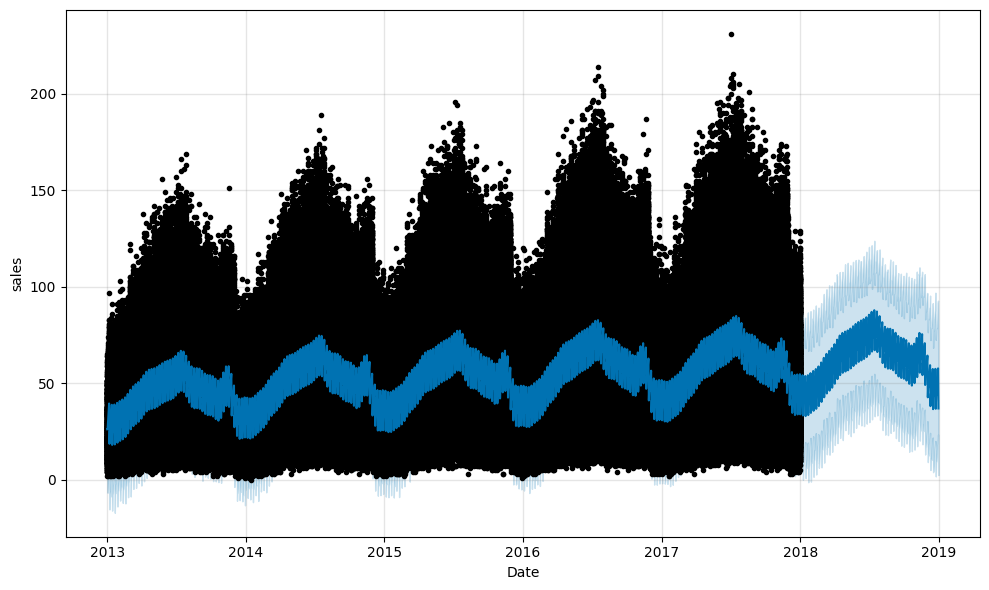

In [22]:
plt.figure()
model.plot(forecast, xlabel='Date', ylabel='sales')
plt.show()